In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
path = '../input/'
SP_df = pd.read_csv(path+'StudentsPerformance.csv')
SP_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Categorical count of independent variables

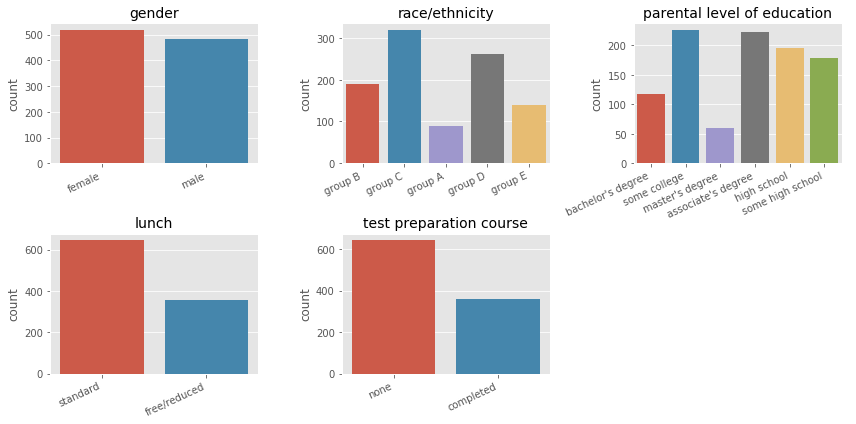

In [2]:

in_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']
fig,axarr = plt.subplots(2,3,figsize=(12,6))
axarr[-1, -1].axis('off')
for id,col in enumerate(in_cols):
    ax = axarr.flat[id]
    sns.countplot(x=col, data=SP_df,ax=ax)
    ax.set_title(col,fontsize=14)
    ax.set_xlabel('')
    plt.setp(ax.get_xticklabels(), rotation=25,ha='right')
plt.tight_layout()
plt.show()

### What factors correlate with low scores?

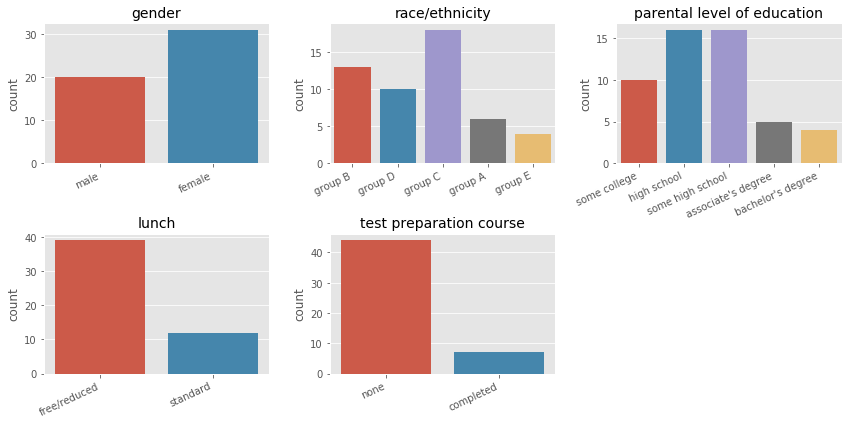

In [3]:
Low_df = SP_df[(SP_df['math score']<40) | (SP_df['reading score']<40) | (SP_df['writing score']<40)]
in_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']
fig,axarr = plt.subplots(2,3,figsize=(12,6))
axarr[-1, -1].axis('off')
for id,col in enumerate(in_cols):
    ax = axarr.flat[id]
    sns.countplot(x=col, data=Low_df,ax=ax)
    ax.set_title(col,fontsize=14)
    ax.set_xlabel('')
    plt.setp(ax.get_xticklabels(), rotation=25,ha='right')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


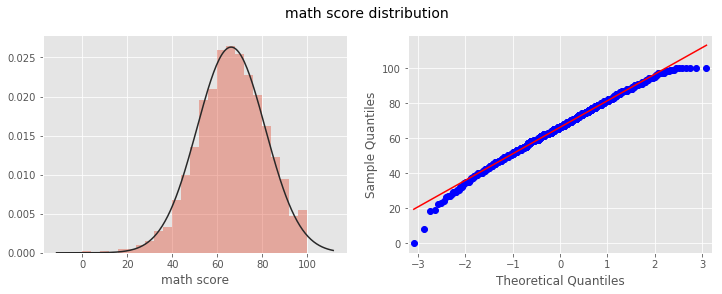

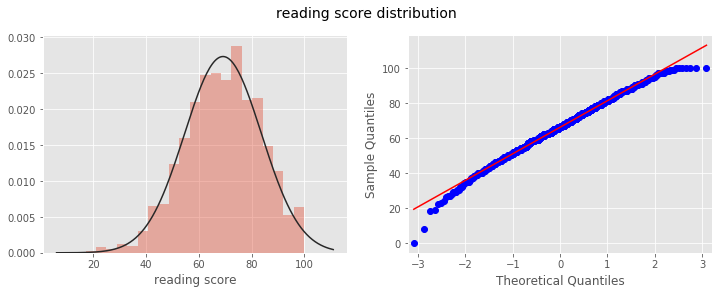

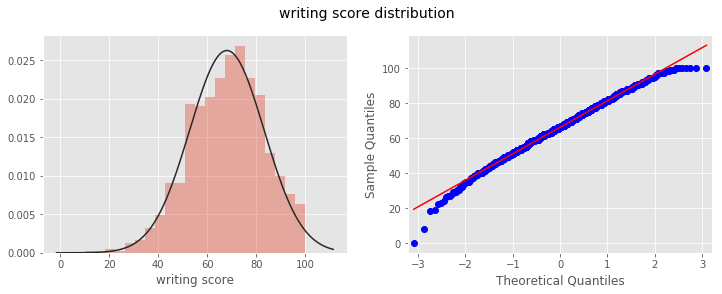

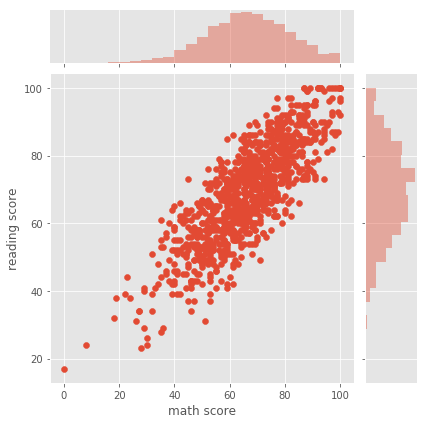

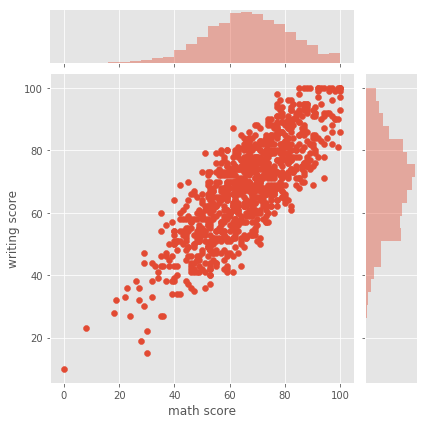

In [6]:
score_cols = ['math score', 'reading score','writing score']
from scipy.stats import norm

def Plot_Dist(df,col):
    fig,axarr = plt.subplots(1,2,figsize=(12,4))
    # plot distribution
    sns.distplot(df[col], fit=norm, kde=False,ax=axarr[0])
    #Q-Q plot
    from statsmodels.graphics.gofplots import qqplot
    qqplot(SP_df['math score'],line='s',ax=axarr[1])
    fig.suptitle(col+' distribution',fontsize=14)
    plt.show()

Plot_Dist(SP_df,col='math score')
Plot_Dist(SP_df,col='reading score')
Plot_Dist(SP_df,col='writing score')


ax1=sns.jointplot(x="math score", y="reading score", data=SP_df)
plt.show()

ax2=sns.jointplot(x="math score", y="writing score", data=SP_df)
plt.show()

In [8]:
def Plot_Set(df,xcol,ycols):
    df = df.sort_values(by=xcol)
    fig,axarr = plt.subplots(1,3,figsize=(12,5))
    for id,ycol in enumerate(ycols):
        medians = df.groupby([xcol])[ycol].median().values
        median_labels = [str(np.round(s, 2)) for s in medians]
        pos = range(len(medians))
        sns.boxplot(x=xcol, y=ycol, data=df,width=0.5,palette='Set3',ax=axarr[id],linewidth=0.5)
        for tick,label in zip(pos,axarr[id].get_xticklabels()):
            axarr[id].text(pos[tick], medians[tick] + 0.5, median_labels[tick], horizontalalignment='center', size='medium', color='k', weight='semibold')
        axarr[id].set_ylim([0,105])
        plt.setp(axarr[id].get_xticklabels(), rotation=25,ha='right')
    #fig.suptitle('Variation of Scores with '+xcol,fontsize=16,y=1.05)
    plt.tight_layout()
    plt.show()

#### Variation of Scores with Gender of the student

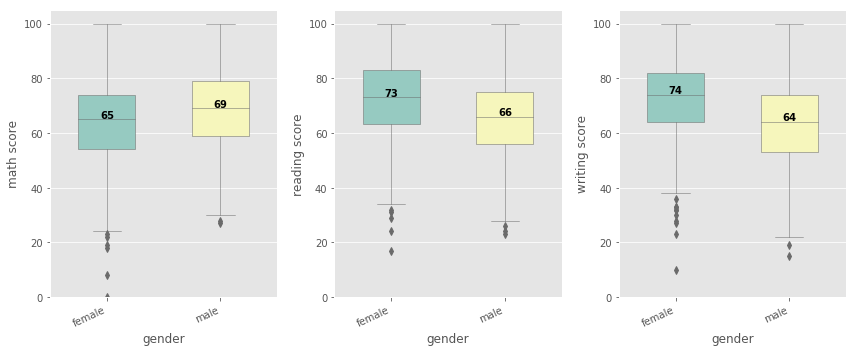

In [9]:
Plot_Set(SP_df,xcol='gender',ycols=['math score','reading score','writing score'])

#### Variation of Scores with race/ethnicity

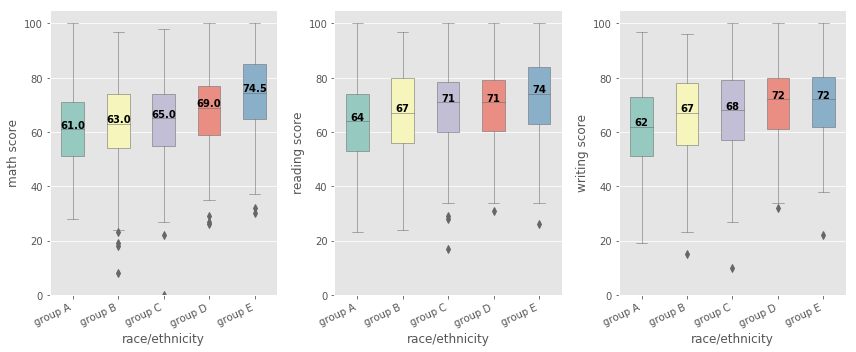

In [10]:
Plot_Set(SP_df,xcol='race/ethnicity',ycols=['math score','reading score','writing score'])

#### Variation of Scores with parental level of education

In [ ]:
Plot_Set(SP_df,xcol='parental level of education',ycols=['math score','reading score','writing score'])

#### Variation of Scores with lunch type

In [ ]:
Plot_Set(SP_df,xcol='lunch',ycols=['math score','reading score','writing score'])

#### Variation of Scores with test preparation course

In [ ]:
Plot_Set(SP_df,xcol='test preparation course',ycols=['math score','reading score','writing score'])

### How does test preparation affect scores for students from different income levels (based on lunch type) ?

In [ ]:
xcol = 'lunch'
ycols = ['math score','reading score','writing score']

SP_df = SP_df.sort_values(by=xcol)
fig,axarr = plt.subplots(1,3,figsize=(12,5))
for id,ycol in enumerate(ycols):
    sns.boxplot(x=xcol, y=ycol, hue='test preparation course', data=SP_df,width=0.5,palette='Set3',ax=axarr[id],linewidth=0.5)
    axarr[id].set_ylim([0,105])
    plt.setp(axarr[id].get_xticklabels(), rotation=25,ha='right')
#fig.suptitle('Variation of Scores with '+xcol,fontsize=16,y=1.05)
plt.tight_layout()
plt.show()

# Hypothesis Testing
df_LunchFree_PrepNo  = SP_df[(SP_df['lunch'].str.contains('free')) & (SP_df['test preparation course'].str.contains('none'))]
df_LunchFree_PrepYes = SP_df[(SP_df['lunch'].str.contains('free')) & (SP_df['test preparation course'].str.contains('complete'))]

df_LunchStd_PrepNo  = SP_df[(SP_df['lunch'].str.contains('stan')) & (SP_df['test preparation course'].str.contains('none'))]
df_LunchStd_PrepYes = SP_df[(SP_df['lunch'].str.contains('stan')) & (SP_df['test preparation course'].str.contains('complete'))]

def CompMeans(df1,df2,ct,yparam,ax):
    import statsmodels.stats.api as sms
    yval = 0.25
    cols = ['math score','reading score','writing score']
    meanlist = []
    CFlist   = []
    for col in cols:
        X1 = df1[col]
        X2 = df2[col]
        cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
        means_diff = X1.mean() - X2.mean()
        CF = cm.tconfint_diff(usevar='unequal')
        print('impact of test prep on '+col+' for lunch type: '+yparam)
        print(cm.summary())
        x1 = CF[0]
        x2 = CF[1]
        ax.plot( [x1,x2],[yval,yval], marker='|',markersize=12, color=ct[0], linewidth=12)
        ax.plot(means_diff,yval,marker='d',color=ct[1],markersize=12)
        ax.annotate(col,xy=(x1-1.5, yval), xycoords='data')
        yval +=0.25
        ax.set_ylabel(yparam,fontsize=14)
        ax.set_ylim([0,1])
        ax.yaxis.set_ticklabels([])
        
fig,axarr = plt.subplots(2,1,figsize=(8,4),sharex = True)

ct = ['pink','red']
yparam = 'free/reduced'
CompMeans(df_LunchFree_PrepYes,df_LunchFree_PrepNo,ct,yparam,axarr[0])
ct = ['skyblue','blue']
yparam = 'standard'
CompMeans(df_LunchStd_PrepYes,df_LunchStd_PrepNo,ct,yparam,axarr[1])
plt.xlabel('Mean Difference +/- Confidence Interval',fontsize=14)
plt.xlim([0,15])
fig.suptitle('Impact of Test preparation on Scores (Difference in Means)',fontsize=16)
plt.show()

### Predictive Modeling


In [ ]:
from sklearn.model_selection import train_test_split
SP_df['Total Score'] = SP_df['math score'] + SP_df['reading score'] + SP_df['writing score']
input_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Convert Total Scores to Grades
FScore = 40*3 #Total Score Cutoff for Passing Grade
EScore = 50*3 #Total Score Cutoff for E Grade
DScore = 60*3 #Total Score Cutoff for D Grade
CScore = 70*3 #Total Score Cutoff for C Grade
BScore = 80*3 #Total Score Cutoff for B Grade


SP_df.loc[SP_df['Total Score']<FScore,'Grade']  = 'F'
SP_df.loc[(SP_df['Total Score']>=FScore) & (SP_df['Total Score']<EScore),'Grade'] = 'E'
SP_df.loc[(SP_df['Total Score']>=EScore) & (SP_df['Total Score']<DScore),'Grade'] = 'D'
SP_df.loc[(SP_df['Total Score']>=DScore) & (SP_df['Total Score']<CScore),'Grade'] = 'C'
SP_df.loc[(SP_df['Total Score']>=CScore) & (SP_df['Total Score']<BScore),'Grade'] = 'B'
SP_df.loc[(SP_df['Total Score']>=BScore),'Grade'] = 'A'

target_col = ['Grade']

X = pd.get_dummies(SP_df[input_cols])
y = np.array(SP_df[target_col]).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(y)

y_trainLB = lb.transform(y_train)
y_testLB = lb.transform(y_test)

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs',fit_intercept=False, multi_class='multinomial')
clf.fit(X_train, y_train)

# Make predictions using the testing set
y_prob = clf.predict_proba(X_test)
y_pred = [x[1] for x in y_prob]

## Plot ROC Curve for all classes
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test# ground truth labels
y_probas = y_prob# predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc(y_true, y_probas,figsize=(8,8))
plt.show()


Fimp = pd.DataFrame({'Features':X.columns.tolist(),'Coefficient':clf.coef_[0]})
Fimp['odds'] = np.exp(Fimp['Coefficient'])
Fimp = Fimp.sort_values(by=['odds'],ascending=False)
Fimp

### Random Forest Classifier

In [ ]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=10, max_depth=5,random_state=0)

n_features = X_test.shape[1]
# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(50, 500, name='n_estimators'),
          Integer(1, n_features, name='max_features'),
          Integer(1, 50, name='max_depth')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    clf.set_params(**params)
    return -np.mean(cross_val_score(clf, X_train, y_trainLB, cv=5, n_jobs=-1,scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)

"Best score=%.4f" % res_gp.fun
print("""Best parameters:
- n_estimators=%d
- max_features=%d
- max_depth=%d""" % (res_gp.x[0], res_gp.x[1], res_gp.x[2]))

from skopt.plots import plot_convergence
%matplotlib inline
plot_convergence(res_gp);

from sklearn.metrics import mean_squared_error, r2_score
best_params = {'n_estimators':res_gp.x[0],'max_features':res_gp.x[1],'max_depth':res_gp.x[2]}

clf = RandomForestClassifier(**best_params)
clf.fit(X_train,y_train)

# Make predictions using the testing set
y_prob = clf.predict_proba(X_test)
y_pred = [x[1] for x in y_prob]

## Plot ROC Curve for all classes
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test# ground truth labels
y_probas = y_prob# predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc(y_true, y_probas,figsize=(8,8))
plt.show()

Fimp = pd.DataFrame({'Features':X.columns.tolist(),'Importance':clf.feature_importances_})
Fimp = Fimp.sort_values(by=['Importance'],ascending=False)
Fimp